## The order of example code follows the cheat sheet for ease of use and understanding

---

<img src="../docs/img/package_overview.png">

# Import `GliderTools`

SMW note: these notebooks were developed and should be run in the [test_env_glidertools environment](https://github.com/GliderToolsCommunity/GliderTools/blob/e58fef1b0615c60ba1a55935c606d1f8b8129eef/docs/contributing.rst#preparing-pull-requests). As of July 2023, this required a local install of GliderTools with a couple bugs fixed.

In [1]:
%matplotlib inline
import os
import glidertools as gt
import xarray as xr # for file I/O
import numpy as np
import pandas as pd
from cmocean import cm as cmo  # we use this for colormaps
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import warnings
warnings.simplefilter("ignore")

# Loading data

### Load AMLR sample data

Load sample data: selected data from amlr06-20221205, extracted using 'resources/locals/sample_data_extract.py'

Add dive+profile info

In [2]:
nc_ngdac_path = "C:/SMW/Gliders_Moorings/Gliders/sample-profiles"

ds_list = []
for i in os.listdir(nc_ngdac_path):
    # print(i)
    ds_tmp = xr.open_dataset(os.path.join(nc_ngdac_path, i))
    ds_list.append(ds_tmp)
    
print(f"There are {len(ds_list)} datasets in ds_list")

ds = xr.concat(ds_list, dim="time")
ds

There are 27 datasets in ds_list


<xarray.Dataset>
Dimensions:             (time: 177116)
Coordinates:
  * time                (time) datetime64[ns] 2022-12-12T09:45:21.171570176 ....
Data variables: (12/40)
    latitude            (time) float64 nan nan nan nan ... nan nan nan nan
    longitude           (time) float64 nan nan nan nan ... nan nan nan nan
    depth               (time) float64 0.009904 nan nan nan ... 772.9 nan 773.0
    m_depth             (time) float32 nan nan nan nan ... 776.4 nan nan nan
    m_heading           (time) float32 nan nan nan nan nan ... 2.058 nan nan nan
    m_pitch             (time) float32 nan nan nan nan ... 0.05236 nan nan nan
    ...                  ...
    instrument_solocam  (time) float32 nan nan nan nan nan ... nan nan nan nan
    trajectory          (time) <U20 'amlr06-20221205T1322' ... 'amlr06-202212...
    profile_lat         (time) float64 -62.82 -62.82 -62.82 ... -63.0 -63.0
    profile_lon         (time) float64 -60.05 -60.05 -60.05 ... -59.45 -59.45
    profile_time        (time) datetime64[ns] 2022-12-12T10:29:24.013684992 ....
    profile_direction   (time) <U1 'd' 'd' 'd' 'd' 'd' ... 'd' 'd' 'd' 'd' 'd'
Attributes: (12/68)
    Conventions:                     CF-1.6, COARDS, ACDD-1.3
    acknowledgment:                  This work was supported by funding from ...
    cdm_data_type:                   trajectory
    comment:                         TrajectoryProfile
    contributor_name:                Christian Reiss, George Watters, Jennife...
    contributor_role:                Principal Investigator, Principal Invest...
    ...                              ...
    time_coverage_resolution:        PTS
    time_coverage_start:             2022-12-12T09:45:21Z
    title:                           amlr06 20221212T102924Z trajectoryProfile
    wmo_platform_code:                
    deployment_name:                 amlr06-20221205T1322
    uuid:                            b1a3b6a8-0365-47da-879a-ea9e0edb6a8d

In [3]:
df = ds[['profile_id', 'profile_direction']].to_pandas()
df['profile_id_dup'] = df.profile_id.duplicated(keep='first')
df['profile_id_cumsum'] = df.profile_id_dup.eq(False).cumsum()
df['dive'] = df.profile_id_cumsum / 2 + 0.5
df

ds["dives"] = (["time"], df.dive)
ds

<xarray.Dataset>
Dimensions:             (time: 177116)
Coordinates:
  * time                (time) datetime64[ns] 2022-12-12T09:45:21.171570176 ....
Data variables: (12/41)
    latitude            (time) float64 nan nan nan nan ... nan nan nan nan
    longitude           (time) float64 nan nan nan nan ... nan nan nan nan
    depth               (time) float64 0.009904 nan nan nan ... 772.9 nan 773.0
    m_depth             (time) float32 nan nan nan nan ... 776.4 nan nan nan
    m_heading           (time) float32 nan nan nan nan nan ... 2.058 nan nan nan
    m_pitch             (time) float32 nan nan nan nan ... 0.05236 nan nan nan
    ...                  ...
    trajectory          (time) <U20 'amlr06-20221205T1322' ... 'amlr06-202212...
    profile_lat         (time) float64 -62.82 -62.82 -62.82 ... -63.0 -63.0
    profile_lon         (time) float64 -60.05 -60.05 -60.05 ... -59.45 -59.45
    profile_time        (time) datetime64[ns] 2022-12-12T10:29:24.013684992 ....
    profile_direction   (time) <U1 'd' 'd' 'd' 'd' 'd' ... 'd' 'd' 'd' 'd' 'd'
    dives               (time) float64 1.0 1.0 1.0 1.0 ... 14.0 14.0 14.0 14.0
Attributes: (12/68)
    Conventions:                     CF-1.6, COARDS, ACDD-1.3
    acknowledgment:                  This work was supported by funding from ...
    cdm_data_type:                   trajectory
    comment:                         TrajectoryProfile
    contributor_name:                Christian Reiss, George Watters, Jennife...
    contributor_role:                Principal Investigator, Principal Invest...
    ...                              ...
    time_coverage_resolution:        PTS
    time_coverage_start:             2022-12-12T09:45:21Z
    title:                           amlr06 20221212T102924Z trajectoryProfile
    wmo_platform_code:                
    deployment_name:                 amlr06-20221205T1322
    uuid:                            b1a3b6a8-0365-47da-879a-ea9e0edb6a8d

To sync up with GliderTools code so less variable renaming

In [4]:
dat = ds

# # variable assignment for conveniant access
# depth = dat.depth
# dives = dat.dives
# lats = dat.latitude
# lons = dat.longitude
# time = dat.time
# pres = dat.pressure
# temp = dat.temp_raw
# salt = dat.salt_raw
# par = dat.par_raw
# bb700 = dat.bb700_raw
# bb470 = dat.bb470_raw
# fluor = dat.flr_raw

# # name coordinates for quicker plotting
# x = dat.dives
# y = dat.depth

# variable assignment for conveniant access
depth = dat.idepth
dives = dat.dives
lats = dat.lat
lons = dat.lon
time = dat.time

pres = dat.pressure
temp = dat.temperature
salt = dat.salinity

bb700 = dat.beta700
fluor = dat.chlorophyll_a

# name coordinates for quicker plotting
x = dat.profile_time 
y = dat.idepth

### Interpolating data values

Data values (e.g., temperature, salinity) must be interpolated to be used in some of the glidertools functions. Here we plot the original data for reference, and then interpolate. See the below section for the plots of the 'original' inteprolated data.

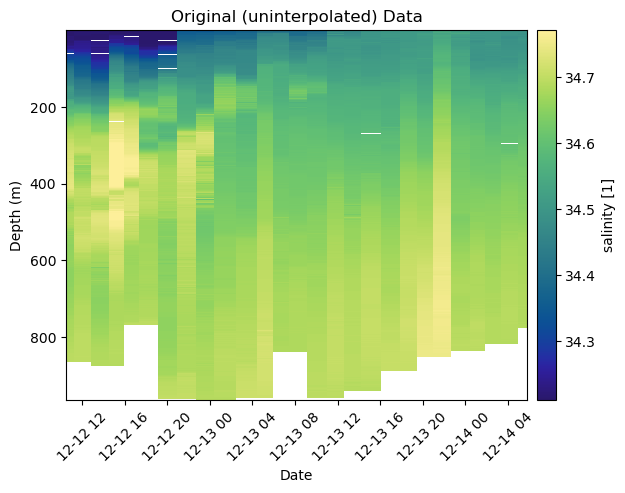

In [5]:
gt.plot(x, y, salt, cmap=cmo.haline, robust=True)
plt.title('Original (uninterpolated) Data')
plt.show()

salt.values = salt.to_pandas().interpolate(
    method='time', limit_direction='forward', limit_area='inside')
# print(salt)

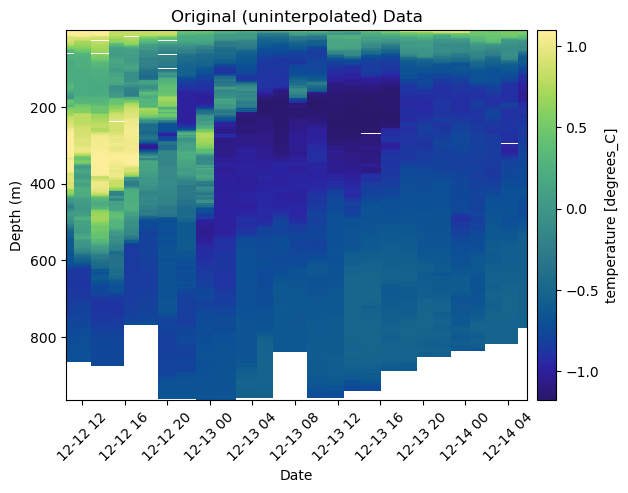

In [6]:
gt.plot(x, y, temp, cmap=cmo.haline, robust=True)
plt.title('Original (uninterpolated) Data')
plt.show()

temp.values = temp.to_pandas().interpolate(
    method='time', limit_direction='forward', limit_area='inside')
# print(temp)

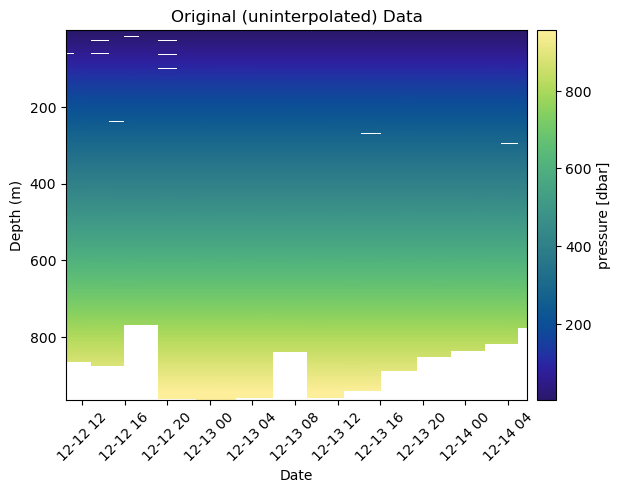

In [7]:
gt.plot(x, y, pres, cmap=cmo.haline, robust=True)
plt.title('Original (uninterpolated) Data')
plt.show()

pres.values = pres.to_pandas().interpolate(
    method='time', limit_direction='forward', limit_area='inside')
# print(pres)

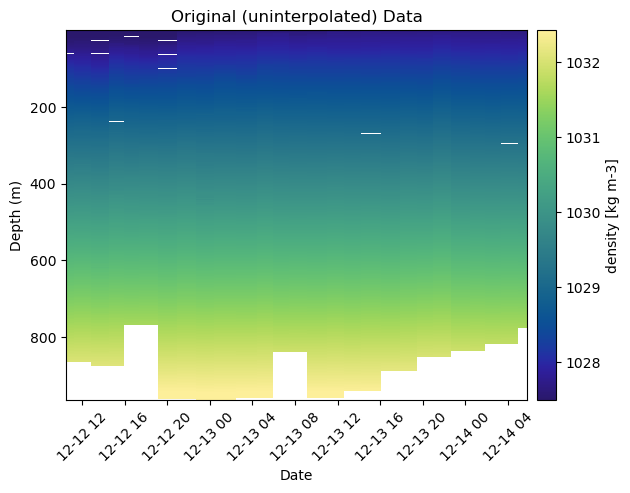

In [8]:
gt.plot(x, y, dat.density, cmap=cmo.haline, robust=True)
plt.title('Original (uninterpolated) Data')
plt.show()

dat.density.values = dat.density.to_pandas().interpolate(
    method='time', limit_direction='forward', limit_area='inside')
# print(dat.density)

# Cleaning

The `cleaning` module contains several tools that help to remove erroneous data - profiles or points. 
These filters can be applied *globally* (IQR and standard devation limits), *vertically* (running average filters) or *horizontally* (horizontal filters on gridded data only). 

There are also two approaches one can use to clean data: 1) filtering out bad points/dives; 2) smoothing data.

Below we use **salinity** to demonstrate the different functions available to users.

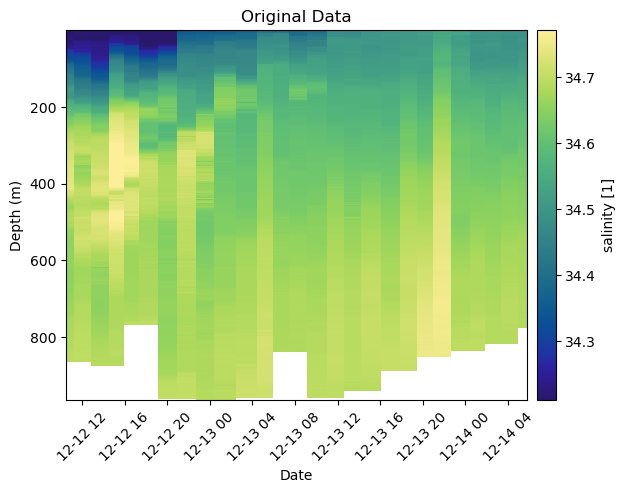

In [9]:
gt.plot(x, y, salt, cmap=cmo.haline, robust=True)
plt.title('Original Data')
plt.show()

## Global filtering: outlier limits (IQR & STD)
These functions find upper and lower limits for data outliers using interquartile range and standard deviations of the entire dataset. Multipliers can be set to make the filters more or less strict 

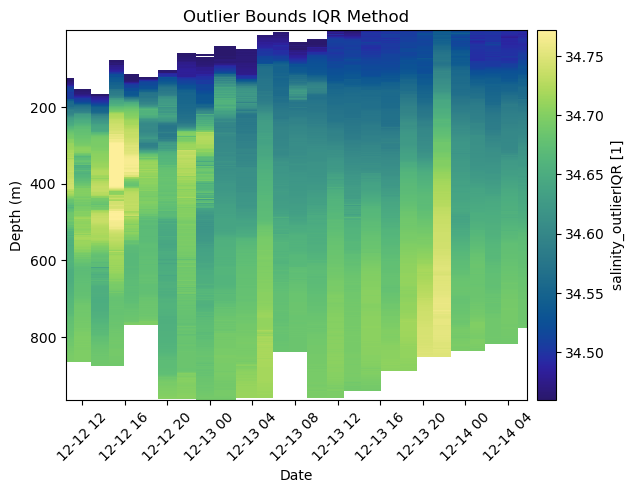

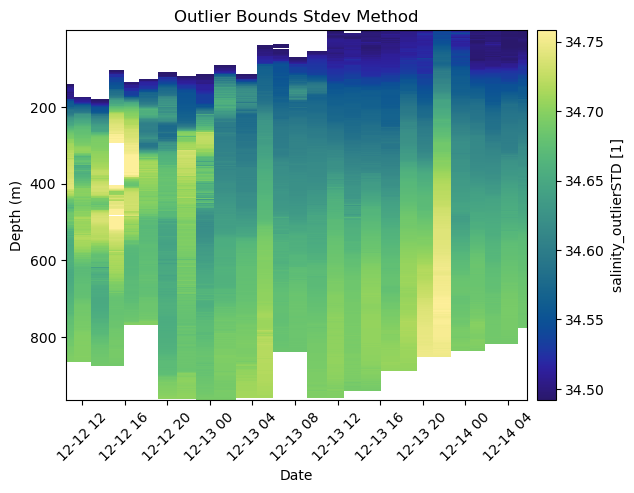

In [10]:
salt_iqr = gt.cleaning.outlier_bounds_iqr(salt, multiplier=1.5)
salt_std = gt.cleaning.outlier_bounds_std(salt, multiplier=1.5)

# Plotting 
gt.plot(x, y, salt_iqr, cmap=cmo.haline, robust=True)
plt.title('Outlier Bounds IQR Method')
plt.show()

gt.plot(x, y, salt_std, cmap=cmo.haline, robust=True)
plt.title('Outlier Bounds Stdev Method')
plt.show()

In [11]:
print(salt_std)
print('\n\nExample of processing stored as attribute under history\n' + '-'*41)
print(salt_std.history)

<xarray.DataArray 'salinity_outlierSTD' (time: 177116)>
array([        nan,         nan,         nan, ..., 34.68655555,
       34.68669395, 34.68683117])
Coordinates:
  * time     (time) datetime64[ns] 2022-12-12T09:45:21.171570176 ... 2022-12-...
Attributes:
    instrument:        instrument_ctd
    long_name:         Practical Salinity
    observation_type:  calculated
    standard_name:     sea_water_practical_salinity
    units:             1
    valid_max:         0.0
    valid_min:         40.0
    history:           [2023-08-17 16:44:49] (vNone) glidertools.cleaning.out...
    outlier_lims:      [34.49028701849945, 34.769648617057165]


Example of processing stored as attribute under history
-----------------------------------------
[2023-08-17 16:44:49] (vNone) glidertools.cleaning.outlier_bounds_std(arr=<arr>, multiplier=1.5);



## Horizontal filtering: differential outliers 
Erroneous measurements often occur sequentially - i.e. in the vertical. The vertical filtering approaches would thus miss any outliers as rolling windows are often used. It is thus useful to have an approach that compares dives in the horizontal. The `horizontal_diff_outliers` first grids data and then calculates where gradients (rolling mean - measurement) are outliers (same as `outlier_bounds_std`). If a certain fraction of measurements in a dive exceed the threshold, then that dive is deemed a bad dive. The example below shows three dives that have anomalous measurements.  These fall well within the global bounds of acceptable data, but horizontally that are masked out.

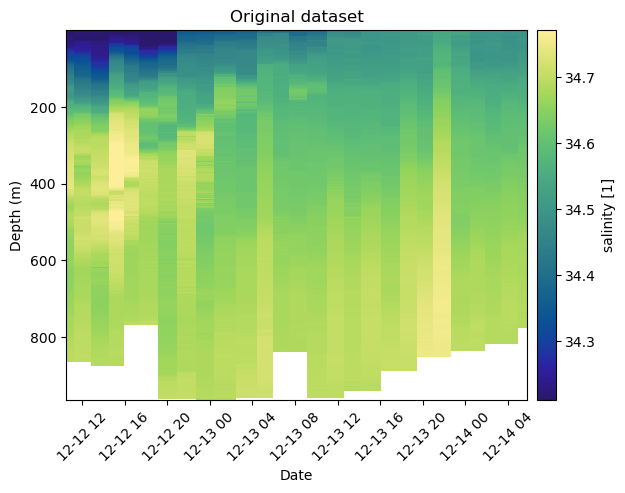

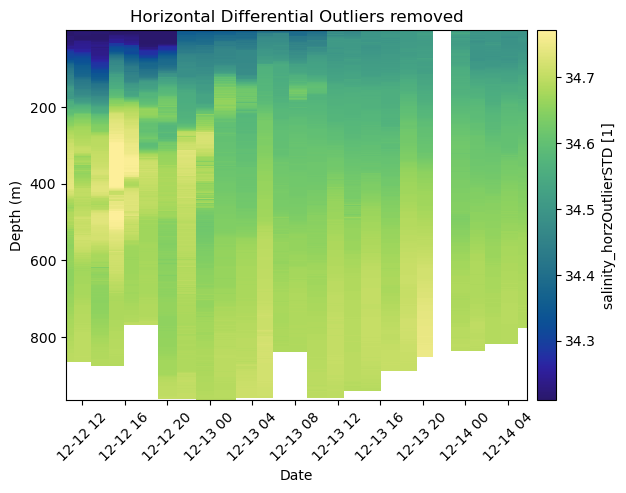

In [12]:
salt_horz = gt.cleaning.horizontal_diff_outliers(
    x, y, salt, multiplier=3, depth_threshold=400, mask_frac=0.1)

gt.plot(x, y, salt, cmap=cmo.haline)
plt.title('Original dataset')
plt.show()

gt.plot(x, y, salt_horz, cmap=cmo.haline)
plt.title('Horizontal Differential Outliers removed')
plt.show()

In [13]:
# print(salt.to_pandas().describe())
# print(salt_iqr.to_pandas().describe())
# print(salt_std.to_pandas().describe())
# print(salt_horz.to_pandas().describe())

## Vertical smoothing approaches

#### Despiking
This approach was used by Briggs et al. (2010). The idea is to apply a rolling filter to the data (along the time dimension). This forms the baseline. The difference from the original data are spikes. 

There are two rolling filters that can be applied to the data. The *median* approach is the equivalent of a rolling median. The *minmax* approach first applies a rolling minimum and then rolling maximum to data. This is useful particularly for optics data where spikes are particles in the water column and are not normally distributed. 

In the case of salinity, the *median* approach is likely best, as "spikes" would be positive and negative (Gaussian distribution). 

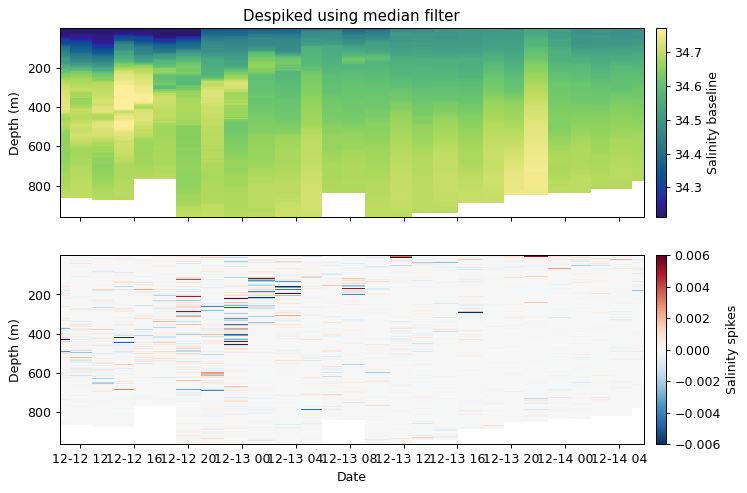

In [14]:
salt_base, salt_spike = gt.cleaning.despike(salt, window_size=5, spike_method='median')

fig, ax = plt.subplots(2, 1, figsize=[9, 6], sharex=True, dpi=90)

gt.plot(x, y, salt_base, cmap=cmo.haline, ax=ax[0])
ax[0].set_title('Despiked using median filter')
ax[0].cb.set_label('Salinity baseline')
ax[0].set_xlabel('')

gt.plot(x, y, salt_spike, cmap=cm.RdBu_r, vmin=-6e-3, vmax=6e-3, ax=ax[1])
ax[1].cb.set_label('Salinity spikes')

plt.xticks(rotation=0)
plt.show()

### Rolling window

The rolling window method simply applies an aggregating function (`mean, median, std, min, max`) to the dataset. 
Because the above example is equivalent to a rolling median, we show what a rolling `75th percentile` looks like instead. 

This could be used to create additional filters by users. Note that in this more complex example we create a wrapper function for the percentile so that we can tell the percentile function that we want the 75th percentile and we want to calculate this along the nth axis.

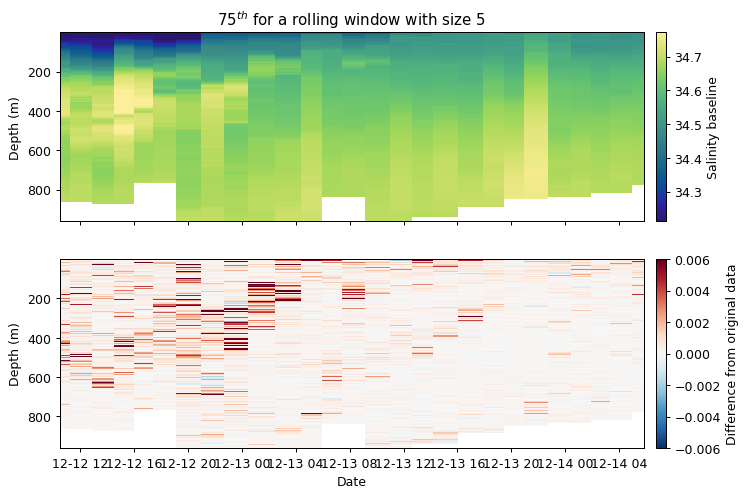

In [15]:
def seventyfith(x, axis=0):
    # wrapper function so we can pass axis and percentile to 
    # the input function
    return np.percentile(x, 75, axis=axis)

# other numpy functions also work: np.mean, np.median, np.std
salt_roll75 = gt.cleaning.rolling_window(salt, seventyfith, window=5)
salt_rollavg = gt.cleaning.rolling_window(salt, np.mean, window=5)

# PLOTTING
fig, ax = plt.subplots(2, 1, figsize=[9, 6], sharex=True, dpi=90)

gt.plot(x, y, salt_roll75, cmap=cmo.haline, ax=ax[0])
ax[0].set_title('75$^{th}$ for a rolling window with size 5')
ax[0].cb.set_label('Salinity baseline')
ax[0].set_xlabel('')

gt.plot(x, y, salt_roll75 - salt, cmap=cm.RdBu_r, vmin=-6e-3, vmax=6e-3, ax=ax[1])
ax[1].cb.set_label('Difference from original data')

plt.xticks(rotation=0)
plt.show()

### Savitzky-Golay 
The Savitzky-Golay function fits a low order polynomial to a rolling window of the time series. This has the result of smoothing the data. A larger window with a lower order polynomial with have a smoother fit.

We recommend a 2nd order kernel. Here we use first order to show that the difference can be quite big.

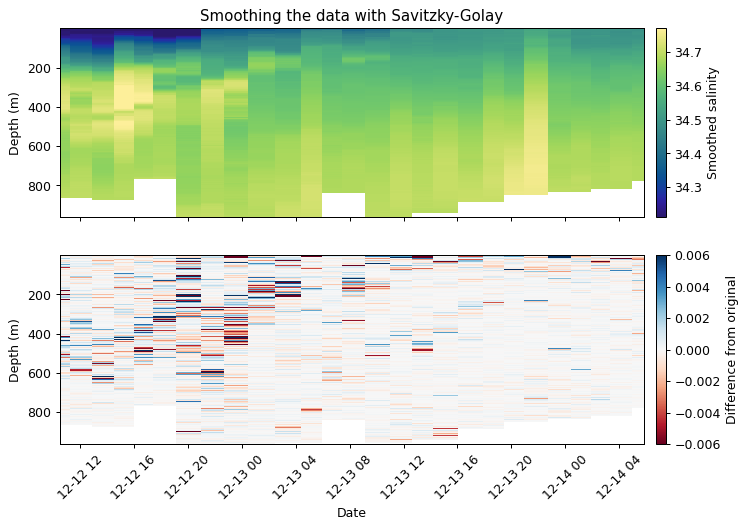

In [16]:
salt_savgol = gt.cleaning.savitzky_golay(salt, window_size=11, order=1)

# PLOTTING
fig, ax = plt.subplots(2, 1, figsize=[9, 6], sharex=True, dpi=90)

gt.plot(x, y, salt_savgol, cmap=cmo.haline, ax=ax[0])
ax[0].set_title('Smoothing the data with Savitzky-Golay')
ax[0].cb.set_label('Smoothed salinity')
ax[0].set_xlabel('')

gt.plot(x, y, salt_savgol - salt, cmap=cm.RdBu, vmin=-6e-3, vmax=6e-3, ax=ax[1])
ax[1].cb.set_label('Difference from original')

plt.show()

## Cleaning Wrapper

Wrapper functions have been designed to make this process more efficient, which is demonstrated below with **temperature**.


Physics Variable:
	Removing outliers with IQR * 1.5: 27081 obs
	Removing spikes with rolling median (spike window=5)
	Smoothing with Savitzky-Golay filter (window=11, order=2)


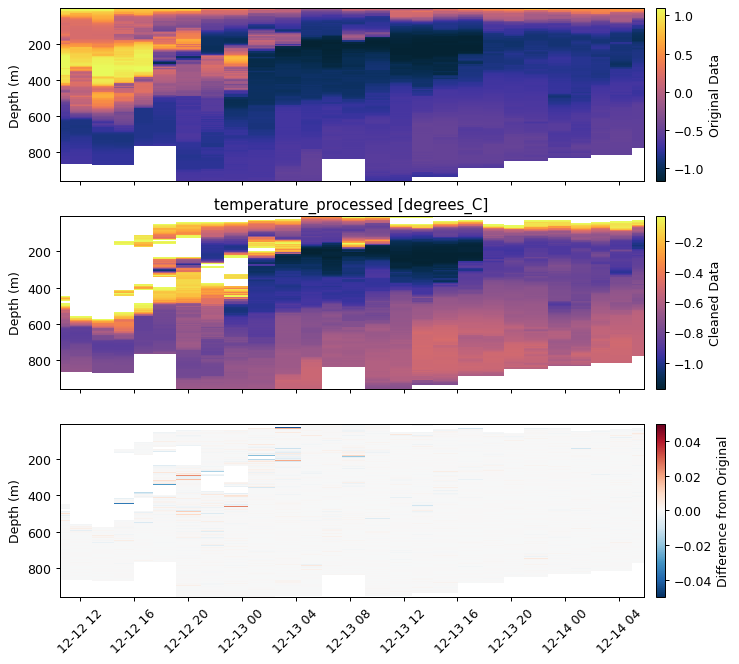

In [17]:
temp_qc = gt.calc_physics(temp, x, y, 
                          iqr=1.5, depth_threshold=0,
                          spike_window=5, spike_method='median',
                          savitzky_golay_window=11, savitzky_golay_order=2)

# PLOTTING
fig, ax = plt.subplots(3, 1, figsize=[9, 8.5], sharex=True, dpi=90)

gt.plot(x, y, temp, cmap=cmo.thermal, ax=ax[0])
gt.plot(x, y, temp_qc, cmap=cmo.thermal, ax=ax[1])
gt.plot(x, y, temp_qc - temp, cmap=cm.RdBu_r, vmin=-0.05, vmax=0.05, ax=ax[2])

[a.set_xlabel('') for a in ax]

ax[0].cb.set_label('Original Data')
ax[1].cb.set_label('Cleaned Data')
ax[2].cb.set_label('Difference from Original')

plt.show()


Physics Variable:
	Removing outliers with IQR * 2.5: 4175 obs
	Removing spikes with rolling median (spike window=5)
	Removing horizontal outliers (fraction=0.2, multiplier=2.5)
	Smoothing with Savitzky-Golay filter (window=11, order=2)


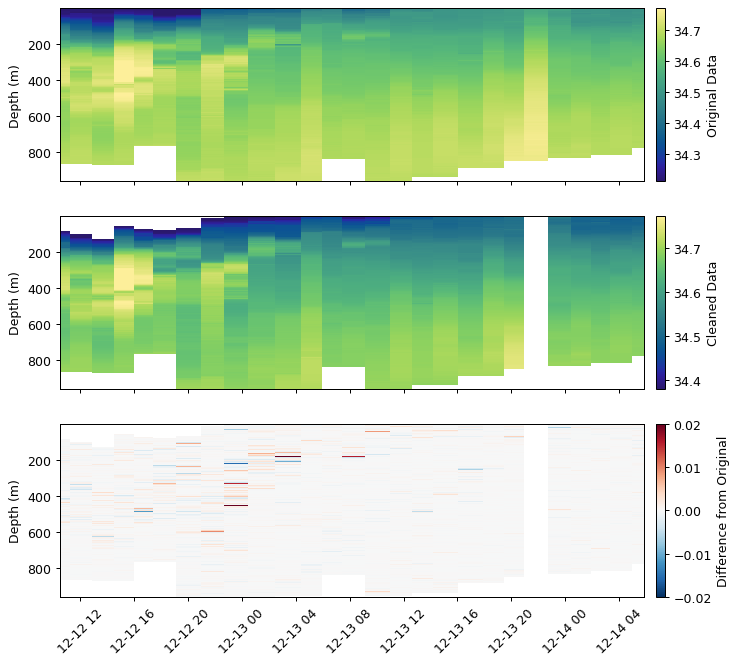

In [18]:
salt_qc = gt.calc_physics(salt, x, y, 
                          mask_frac=0.2, iqr=2.5, 
                          spike_window=5, spike_method='median', 
                          savitzky_golay_window=11, savitzky_golay_order=2)
        
# PLOTTING
fig, ax = plt.subplots(3, 1, figsize=[9, 8.5], sharex=True, dpi=90)

gt.plot(x, y, salt, cmap=cmo.haline, ax=ax[0])
gt.plot(x, y, salt_qc, cmap=cmo.haline, ax=ax[1])
gt.plot(x, y, salt_qc - salt, cmap=cm.RdBu_r, vmin=-0.02, vmax=0.02, ax=ax[2])

[a.set_xlabel('') for a in ax]

ax[0].cb.set_label('Original Data')
ax[1].cb.set_label('Cleaned Data')
ax[2].cb.set_label('Difference from Original')

plt.show()

#### Insert data into original dataset

SMW: We must interpolate the qc'd temperature varibales, so that we can calculate MLD below

In [19]:
temp_qc.values = temp_qc.to_pandas().interpolate(
    method='time', limit_direction='forward', limit_area='inside')

dat['temp_qc'] = temp_qc
dat['salt_qc'] = salt_qc
dat

<xarray.Dataset>
Dimensions:             (time: 177116)
Coordinates:
  * time                (time) datetime64[ns] 2022-12-12T09:45:21.171570176 ....
Data variables: (12/43)
    latitude            (time) float64 nan nan nan nan ... nan nan nan nan
    longitude           (time) float64 nan nan nan nan ... nan nan nan nan
    depth               (time) float64 0.009904 nan nan nan ... 772.9 nan 773.0
    m_depth             (time) float32 nan nan nan nan ... 776.4 nan nan nan
    m_heading           (time) float32 nan nan nan nan nan ... 2.058 nan nan nan
    m_pitch             (time) float32 nan nan nan nan ... 0.05236 nan nan nan
    ...                  ...
    profile_lon         (time) float64 -60.05 -60.05 -60.05 ... -59.45 -59.45
    profile_time        (time) datetime64[ns] 2022-12-12T10:29:24.013684992 ....
    profile_direction   (time) <U1 'd' 'd' 'd' 'd' 'd' ... 'd' 'd' 'd' 'd' 'd'
    dives               (time) float64 1.0 1.0 1.0 1.0 ... 14.0 14.0 14.0 14.0
    temp_qc             (time) float64 nan nan nan ... -0.5417 -0.5417 -0.5417
    salt_qc             (time) float64 nan nan nan nan ... 34.69 34.69 34.69
Attributes: (12/68)
    Conventions:                     CF-1.6, COARDS, ACDD-1.3
    acknowledgment:                  This work was supported by funding from ...
    cdm_data_type:                   trajectory
    comment:                         TrajectoryProfile
    contributor_name:                Christian Reiss, George Watters, Jennife...
    contributor_role:                Principal Investigator, Principal Invest...
    ...                              ...
    time_coverage_resolution:        PTS
    time_coverage_start:             2022-12-12T09:45:21Z
    title:                           amlr06 20221212T102924Z trajectoryProfile
    wmo_platform_code:                
    deployment_name:                 amlr06-20221205T1322
    uuid:                            b1a3b6a8-0365-47da-879a-ea9e0edb6a8d

In [20]:
dat

<xarray.Dataset>
Dimensions:             (time: 177116)
Coordinates:
  * time                (time) datetime64[ns] 2022-12-12T09:45:21.171570176 ....
Data variables: (12/43)
    latitude            (time) float64 nan nan nan nan ... nan nan nan nan
    longitude           (time) float64 nan nan nan nan ... nan nan nan nan
    depth               (time) float64 0.009904 nan nan nan ... 772.9 nan 773.0
    m_depth             (time) float32 nan nan nan nan ... 776.4 nan nan nan
    m_heading           (time) float32 nan nan nan nan nan ... 2.058 nan nan nan
    m_pitch             (time) float32 nan nan nan nan ... 0.05236 nan nan nan
    ...                  ...
    profile_lon         (time) float64 -60.05 -60.05 -60.05 ... -59.45 -59.45
    profile_time        (time) datetime64[ns] 2022-12-12T10:29:24.013684992 ....
    profile_direction   (time) <U1 'd' 'd' 'd' 'd' 'd' ... 'd' 'd' 'd' 'd' 'd'
    dives               (time) float64 1.0 1.0 1.0 1.0 ... 14.0 14.0 14.0 14.0
    temp_qc             (time) float64 nan nan nan ... -0.5417 -0.5417 -0.5417
    salt_qc             (time) float64 nan nan nan nan ... 34.69 34.69 34.69
Attributes: (12/68)
    Conventions:                     CF-1.6, COARDS, ACDD-1.3
    acknowledgment:                  This work was supported by funding from ...
    cdm_data_type:                   trajectory
    comment:                         TrajectoryProfile
    contributor_name:                Christian Reiss, George Watters, Jennife...
    contributor_role:                Principal Investigator, Principal Invest...
    ...                              ...
    time_coverage_resolution:        PTS
    time_coverage_start:             2022-12-12T09:45:21Z
    title:                           amlr06 20221212T102924Z trajectoryProfile
    wmo_platform_code:                
    deployment_name:                 amlr06-20221205T1322
    uuid:                            b1a3b6a8-0365-47da-879a-ea9e0edb6a8d

## Effects of smoothing on profiles
The plots below show the effects of the vertical smoothing filters on the data. 

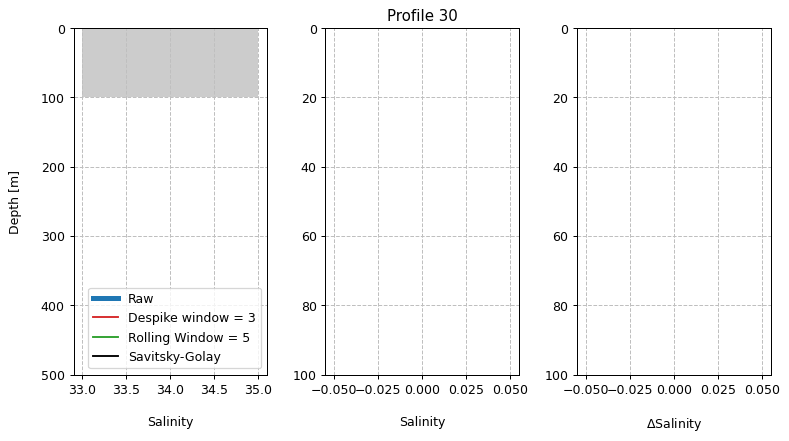

In [21]:
fig, ax = plt.subplots(1, 3, figsize=[10, 5], dpi=90)
fig.subplots_adjust(wspace=0.3)

dive_no = 30

idx = dat.dives==dive_no
colors = mpl.rcParams['axes.prop_cycle'].by_key()['color']

for i in range(2):
    ax[i].plot(salt[idx],         y[idx], c=colors[0], label='Raw', lw=4)
    ax[i].plot(salt_base[idx],    y[idx], c=colors[3], label='Despike window = 3')
    ax[i].plot(salt_rollavg[idx], y[idx], c=colors[2], label='Rolling Window = 5')
    ax[i].plot(salt_savgol[idx],  y[idx], c='k', label='Savitsky-Golay')
    
ax[2].barh(y[idx], salt_savgol[idx]  - salt[idx], zorder=100, facecolor='k')
ax[2].barh(y[idx], salt_base[idx]    - salt[idx], zorder=100, facecolor=colors[3])
ax[2].barh(y[idx], salt_rollavg[idx] - salt[idx], zorder=100, facecolor=colors[2])

ax[0].legend(loc=4)

ymin, ymax= 0, 100
ax[0].fill_between([33, 35], [ymin, ymin], [ymax, ymax], facecolor='k', alpha=0.2)
ax[0].set_ylim(500, 0)
ax[1].set_ylim(ymax, ymin)
ax[0].set_ylabel('Depth [m]', labelpad=15)
ax[0].set_xlabel('Salinity', labelpad=15)
ax[1].set_xlabel('Salinity', labelpad=15)
ax[2].set_xlabel('$\Delta$Salinity', labelpad=15)
ax[1].set_title('Profile ' + str(dive_no))

ax[2].set_ylim(ymax, ymin)
[a.grid(c='0.75', ls='--') for a in ax]

plt.show()

# Deriving secondary physical variables 

### Density
GliderTools provides a wrapper to calculate potential density.  
This is done by first calculating potential temperature and then calculating absolute salinity.  
A reference depth of `0` is used by default

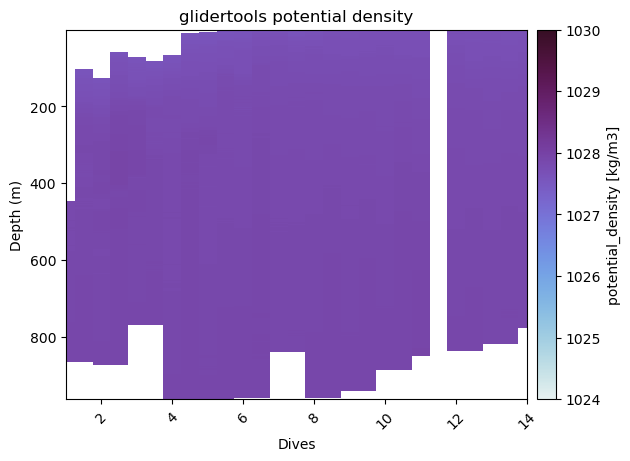

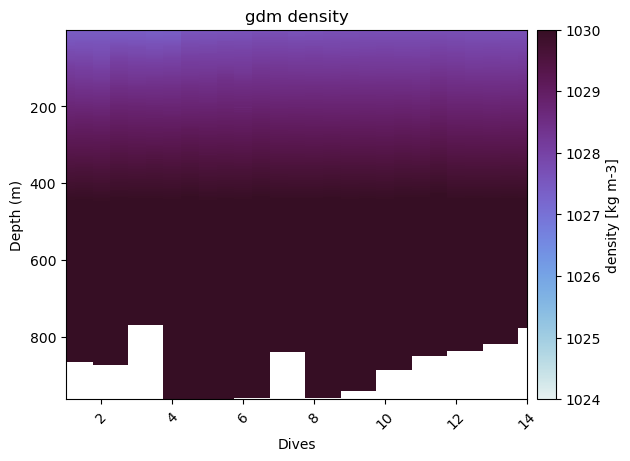

In [22]:
dens0 = gt.physics.potential_density(salt_qc, temp_qc, pres, lats, lons)
dat['dens0'] = dens0
gt.plot(dat.dives, depth, dens0, cmap=cmo.dense, vmin=1024, vmax=1030)
plt.title('glidertools potential density')
plt.show()

# SMW code, for comparison. Note the color bars are different
gt.plot(dat.dives, depth, dat.density, cmap=cmo.dense, vmin=1024, vmax=1030)
plt.title('gdm density')
plt.show()

### Mixed Layer Depth 

Calculate the mixed layer depth, using the GliderTools-derived potential density

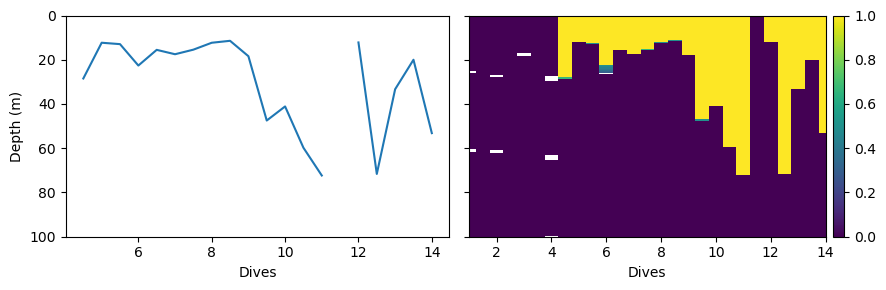

In [23]:
mld = gt.physics.mixed_layer_depth(dat, "dens0")
mld_smoothed = mld.rolling(10, min_periods=3).mean()
mld_mask = gt.utils.mask_below_depth(dat, mld)
mld_grid = gt.grid_data(dat.dives, dat.depth, mld_mask, verbose=False)

fig, ax = plt.subplots(1, 2, figsize=[9, 3], dpi=100, sharey=True)

mld.plot(ax=ax[0])
gt.plot(mld_grid, ax=ax[1])

[a.set_ylim(100, 0) for a in ax]

ax[0].set_ylabel('Depth (m)')
[a.set_xlabel('Dives') for a in ax]
plt.xticks(rotation=0)

fig.tight_layout()

# Optics 

### Backscatter

Set plot min/max based on values

In [24]:
# print(bb700)
print(pd.DataFrame(bb700).describe())

bb700_vmin = 0.00006
bb700_vmax = 0.0002

                   0
count  130983.000000
mean        0.000616
std         0.001314
min         0.000110
25%         0.000148
50%         0.000176
75%         0.000242
max         0.007486


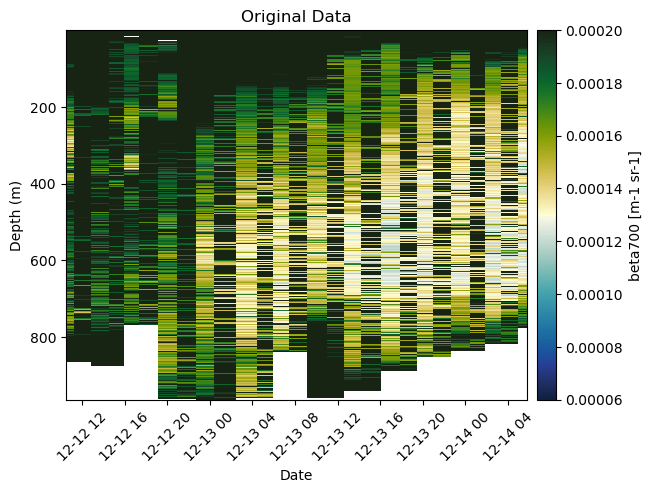

In [25]:
theta = 124
xfactor = 1.076 

gt.plot(x, y, bb700, cmap=cmo.delta, vmin=bb700_vmin, vmax=bb700_vmax)
plt.title('Original Data')
plt.show()

#### Outlier bounds method 

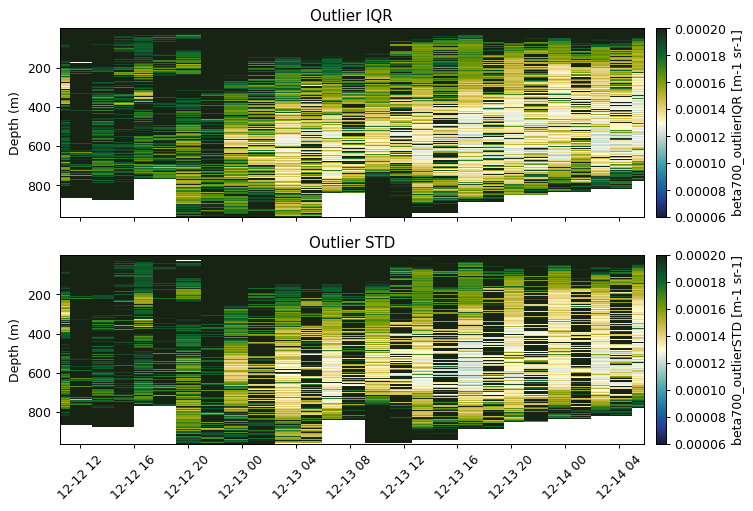

In [26]:
bb700_iqr = gt.cleaning.outlier_bounds_iqr(bb700, multiplier=3)
bb700_std = gt.cleaning.outlier_bounds_std(bb700, multiplier=3)

fig, ax = plt.subplots(2, 1, figsize=[9, 6], sharex=True, dpi=90)

gt.plot(x, y, bb700_iqr, cmap=cmo.delta, ax=ax[0], vmin=bb700_vmin, vmax=bb700_vmax)
gt.plot(x, y, bb700_std, cmap=cmo.delta, ax=ax[1], vmin=bb700_vmin, vmax=bb700_vmax)

[a.set_xlabel('') for a in ax]

ax[0].set_title('Outlier IQR')
ax[1].set_title('Outlier STD')

plt.show()

#### Removing bad profiles
This function masks bad dives based on mean + std x [1] or median + std x [1] at a reference depth.

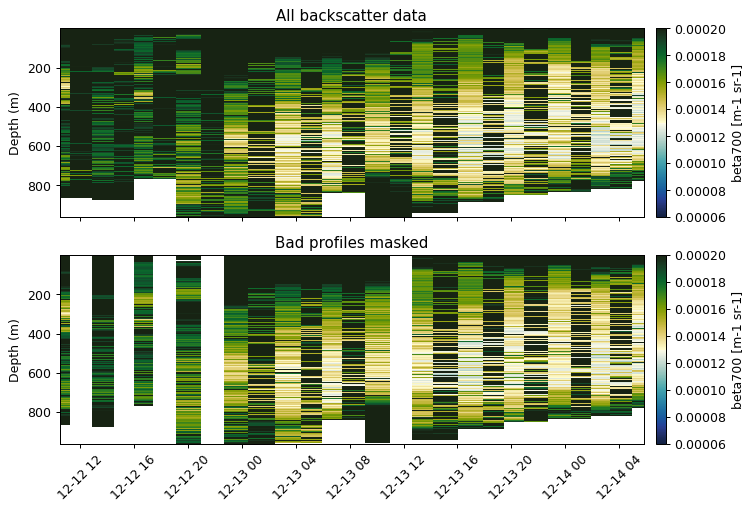

In [27]:
# find_bad_profiles returns boolean mask and dive numbers
# we index only the mask
bad_profiles = gt.optics.find_bad_profiles(dives, depth, bb700, 
                                           ref_depth=300, 
                                           stdev_multiplier=1, 
                                           method='median')[0]

fig, ax = plt.subplots(2, 1, figsize=[9, 6], sharex=True, dpi=90)
# ~ reverses True to False and vice versa - i.e. we mask bad bad profiles
gt.plot(x, y, bb700, cmap=cmo.delta, ax=ax[0], vmin=bb700_vmin, vmax=bb700_vmax)
gt.plot(x, y, bb700.where(~bad_profiles), cmap=cmo.delta, ax=ax[1], vmin=bb700_vmin, vmax=bb700_vmax)

[a.set_xlabel('') for a in ax]

ax[0].set_title('All backscatter data')
ax[1].set_title('Bad profiles masked')

plt.show()

#### Conversion from counts to total backscatter 

The scale and offset function uses the factory calibration dark count and scale factor.

The bback total function uses the coefficients from Zhang et al. (2009) to convert the raw counts into total backscatter (m-1), correcting for temperature and salinity. The $\chi$ factor and $\theta$ in this example were taken from Sullivan et al. (2013) and Slade & Boss (2015). 

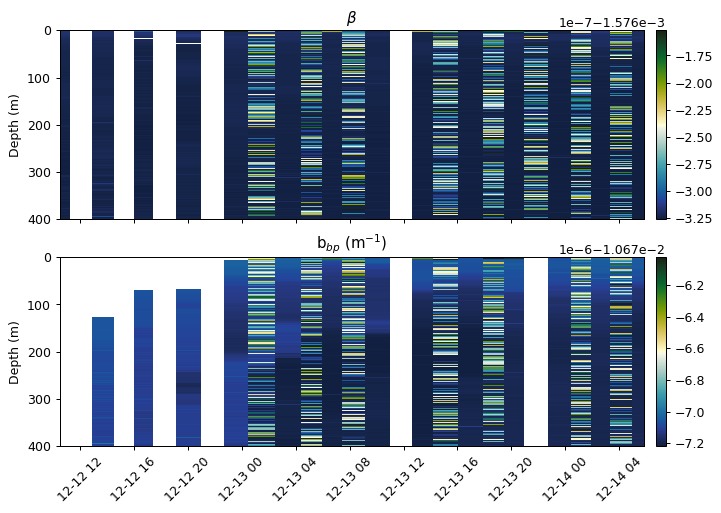

In [28]:
beta = gt.flo_functions.flo_scale_and_offset(bb700.where(~bad_profiles), 49, 3.217e-5)
bbp = gt.flo_functions.flo_bback_total(beta, temp_qc, salt_qc, theta, 700, xfactor)

fig, ax = plt.subplots(2, 1, figsize=[9, 6], sharex=True, dpi=90)

gt.plot(x, y, beta, cmap=cmo.delta, ax=ax[0], robust=True)
gt.plot(x, y, bbp, cmap=cmo.delta, ax=ax[1], robust=True)

[a.set_xlabel('') for a in ax]
[a.set_ylim(400, 0) for a in ax]

ax[0].set_title('$\u03B2$')
ax[1].set_title('b$_{bp}$ (m$^{-1}$)')

plt.show()

#### Correcting for an in situ dark count
Sensor drift from factory calibration requires an additional correction, the calculation of a dark count in situ. This is calculated from the 95th percentile of backscatter measurements between 200 and 400m.

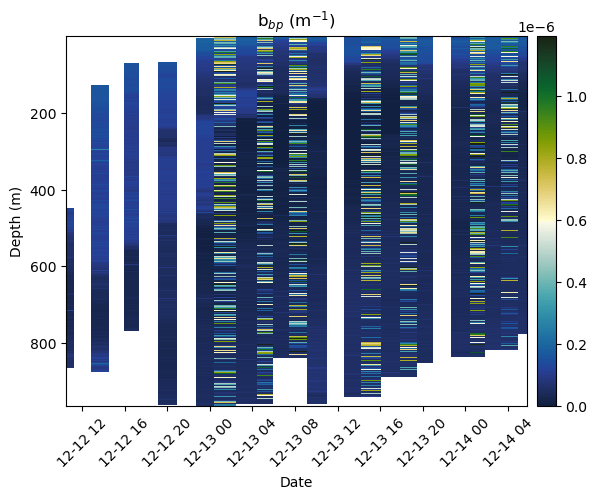

In [29]:
bbp = gt.optics.backscatter_dark_count(bbp, depth)

gt.plot(x, y, bbp, cmap=cmo.delta, robust=True)
plt.title('b$_{bp}$ (m$^{-1}$)')
plt.show()

#### Despiking
Following the methods outlined in Briggs et al. (2011) to both identify spikes in backscatter and remove them from the baseline backscatter signal. The spikes are retained as the data can be used to address specific science questions, but their presence can decrease the accuracy of the fluorescence quenching function.

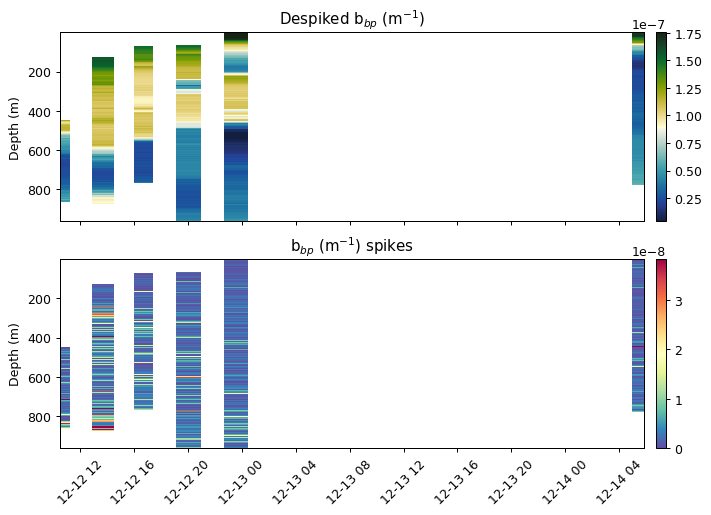

In [30]:
bbp_horz = gt.cleaning.horizontal_diff_outliers(x, y, bbp, depth_threshold=10, mask_frac=0.05)
bbp_baseline, bbp_spikes = gt.cleaning.despike(bbp_horz, 7, spike_method='minmax')


fig, ax = plt.subplots(2, 1, figsize=[9, 6], sharex=True, dpi=90)

gt.plot(x, y, bbp_baseline, cmap=cmo.delta, ax=ax[0], robust=True)
gt.plot(x, y, bbp_spikes, ax=ax[1], cmap=cm.Spectral_r, vmin=0) #, vmax=0.004)

[a.set_xlabel('') for a in ax]

ax[0].set_title('Despiked b$_{bp}$ (m$^{-1}$)')
ax[1].set_title('b$_{bp}$ (m$^{-1}$) spikes')

plt.show()

#### Adding the corrected variables to the original dataframe 

In [31]:
dat['bbp700'] = bbp_baseline
dat['bbp700_spikes'] = bbp_spikes

#### Wrapper function demonstration
A wrapper function was also designed, which is demonstrated below with the second wavelength (700 nm). The default option is for verbose to be True, which will provide an output of the different processing steps.


bb700:
	Removing outliers with IQR * 2.0: 20791 obs
	Mask bad profiles based on deep values (depth=300m)
	Number of bad profiles = 7/27
	Zhang et al. (2009) correction
	Dark count correction
	Spike identification (spike window=11)


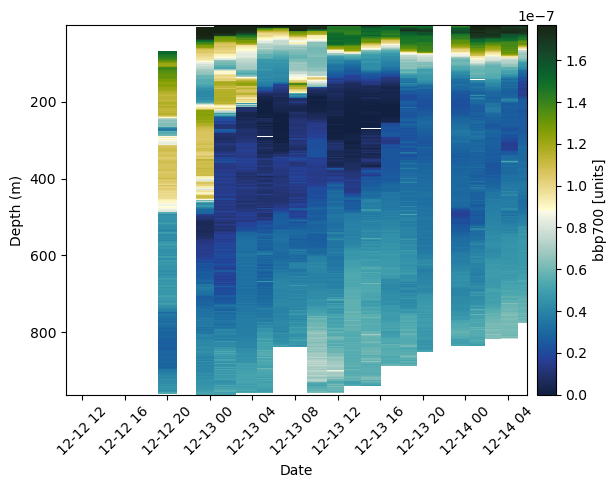

In [32]:
bbp_baseline, bbp_spikes = gt.calc_backscatter(
    bb700, temp_qc, salt_qc, dives, depth, 700, 49, 3.217e-5, 
    spike_window=11, spike_method='minmax', iqr=2., profiles_ref_depth=300,
    deep_multiplier=1, deep_method='median', verbose=True)

dat['bbp700'] = bbp_baseline
dat['bbp700_spikes'] = bbp_spikes

ax = gt.plot(x, y, dat.bbp700, cmap=cmo.delta),


plt.show()

In [33]:
# # No bb470 for AMLR
# bbp_baseline, bbp_spikes = gt.calc_backscatter(
#     bb470, temp_qc, salt_qc, dives, depth, 470, 47, 1.569e-5, 
#     spike_window=7, spike_method='minmax', iqr=3, profiles_ref_depth=300,
#     deep_multiplier=1, deep_method='median', verbose=True)

# dat['bbp470'] = bbp_baseline
# dat['bbp470_spikes'] = bbp_spikes

# gt.plot(x, y, dat.bbp470, cmap=cmo.delta)
# plt.show()

### PAR

SMW note: Pretty sure AMLR gliders don't have a PAR sensor? So this is all commented out

#### PAR Scaling

This function uses the factory calibration to convert from $\mu$V to $\mu$E m$^{-2}$ s$^{-1}$.

In [34]:
# par_scaled = gt.optics.par_scaling(par, 6.202e-4, 10.8)

# fig, ax = plt.subplots(2, 1, figsize=[9, 6], sharex=True, dpi=90)

# gt.plot(x, y, par, cmap=cmo.solar, ax=ax[0], robust=True)
# gt.plot(x, y, par_scaled, cmap=cmo.solar, ax=ax[1], robust=True)

# [a.set_xlabel('') for a in ax]
# [a.set_ylim(70, 0) for a in ax]

# ax[0].set_title('PAR ($\mu$V)')
# ax[1].set_title('PAR ($\mu$E m$^{-2}$ m$^{-1}$)')

# plt.show()

#### Correcting for an in situ dark count

Sensor drift from factory calibration requires an additional correction, the calculation of a dark count in situ. This is calculated from the median of PAR measurements, with additional masking applied for values before 23:01 and outside the 90th percentile.

In [35]:
# par_dark = gt.optics.par_dark_count(par_scaled, dives, depth, time)

# gt.plot(x, y, par_dark, robust=True, cmap=cmo.solar)
# ylim(70,0)
# title('PAR ($\mu$E m$^{-2}$ m$^{-1}$)')
# show()

#### PAR replacement

This function removes the top 5 metres from each dive profile, and then algebraically recalculates the surface PAR using an exponential equation.

In [36]:
# par_filled = gt.optics.par_fill_surface(par_dark, dives, depth, max_curve_depth=80)
# par_filled[par_filled < 0] = 0
# par_filled = par_filled.fillna(0)

In [37]:
# i = dives == 232

# fig, ax = subplots(1, 2, figsize=[6,6], dpi=100)

# ax[0].plot(par_dark[i], depth[i], lw=0.5, marker='o', ms=5)
# ax[0].plot(par_filled[i], depth[i], lw=0.5, marker='o', ms=3)
# ax[1].plot(par_filled[i] - par_dark[i], depth[i], lw=0, marker='o')

# ax[0].set_ylim(80,0)
# ax[0].set_ylabel('Depth (m)')
# ax[0].set_xlabel('PAR ($\mu$E m$^{-2}$ m$^{-1}$)')

# ax[1].set_ylim(80,0)
# ax[1].set_xlim(-350,350)
# ax[1].set_yticklabels('')
# ax[1].set_xlabel('Difference between profiles')

# fig.tight_layout()
# plt.show()

In [38]:
# gt.plot(x, y, par_filled, robust=True, cmap=cmo.solar)
# xlim(200,340)
# ylim(100,0)
# title('PAR ($\mu$E m$^{-2}$ m$^{-1}$)')
# show()

#### Wrapper function demonstration 

In [39]:
# par_qc = gt.calc_par(par, dives, depth, time, 
#                      6.202e-4, 10.8, 
#                      curve_max_depth=80, 
#                      verbose=True).fillna(0)

# gt.plot(x, y, par_qc, robust=True, cmap=cmo.solar)
# ylim(80, 0)
# show()

### Deriving additional variables

#### Euphotic Depth and Light attenuation coefficient 

In [40]:
# euphotic_depth, kd = gt.optics.photic_depth(par_filled, dives, depth, return_mask=False, ref_percentage=1)

In [41]:
# fig, ax = subplots(1, 1, figsize=[6,4], dpi=100)
# p1 = plot(euphotic_depth.index, euphotic_depth, label='Euphotic Depth')
# ylim(120,0)
# ylabel('Euphotic Depth (m)')
# xlabel('Dives')
# ax2 = ax.twinx()
# p2 = plot(kd.index, kd, color='orange', lw=0, marker='o', ms=2, label='K$_d$')
# ylabel('K$_d$', rotation=270, labelpad=20)

# lns = p1+p2
# labs = [l.get_label() for l in lns]
# ax2.legend(lns, labs, loc=3, numpoints=1)

# show()

### Fluorescence

Quenching Correcting Method as outlined in Thomalla et al. (2017)

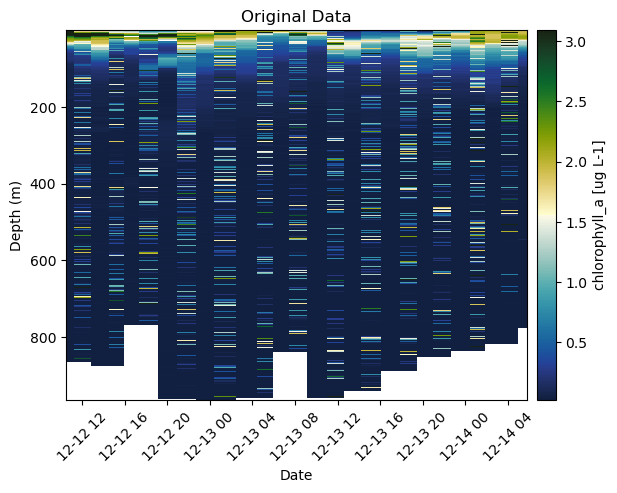

In [42]:
gt.plot(x, y, fluor, cmap=cmo.delta, robust=True)
plt.title('Original Data')
plt.show()

#### Outlier bounds method 

SMW note: changed multiplier from 3 to 100, because 3 got rid of basically everything in the green band, and I wan't sure if this was legit or not?

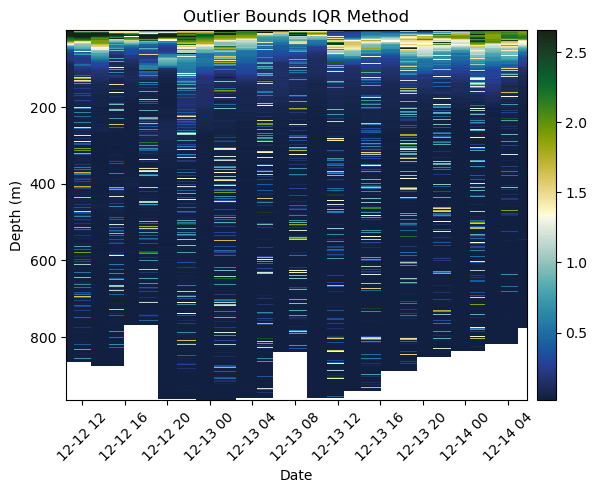

In [43]:
flr_iqr = gt.cleaning.outlier_bounds_iqr(fluor, multiplier=100)

gt.plot(x, y, flr_iqr, cmap=cmo.delta, robust=True)
plt.title('Outlier Bounds IQR Method')
plt.show()

#### Removing bad profiles

This function masks bad dives based on mean + std x [3] or median + std x [3] at a reference depth.

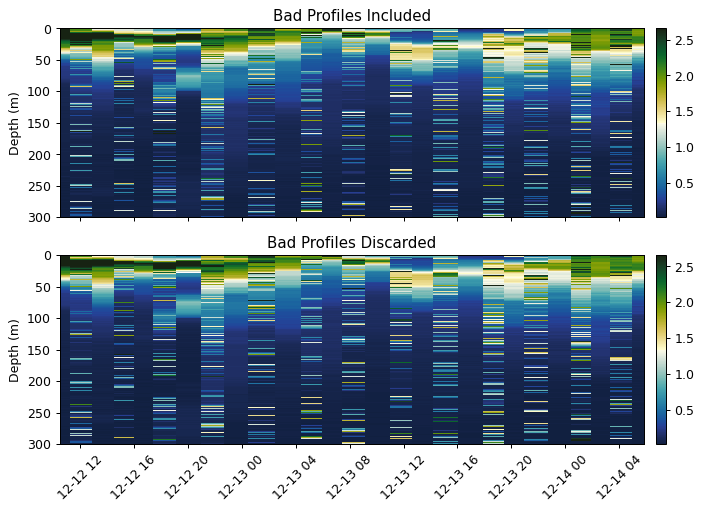

In [44]:
bad_profiles = gt.optics.find_bad_profiles(dives, depth, flr_iqr, 
                                           ref_depth=300, 
                                           stdev_multiplier=4, 
                                           method='mean')
flr_goodprof = flr_iqr.where(~bad_profiles[0])

fig, ax = plt.subplots(2, 1, figsize=[9, 6], sharex=True, dpi=90)

gt.plot(x, y, flr_iqr, cmap=cmo.delta, ax=ax[0], robust=True)
gt.plot(x, y, flr_goodprof, cmap=cmo.delta, ax=ax[1], robust=True)

[a.set_xlabel('') for a in ax]
[a.set_ylim(300, 0) for a in ax]

ax[0].set_title('Bad Profiles Included')
ax[1].set_title('Bad Profiles Discarded')

plt.show()

#### Correcting for an in situ dark count

Sensor drift from factory calibration requires an additional correction, the calculation of a dark count in situ. This is calculated from the 95th percentile of fluorescence measurements between 300 and 400m.

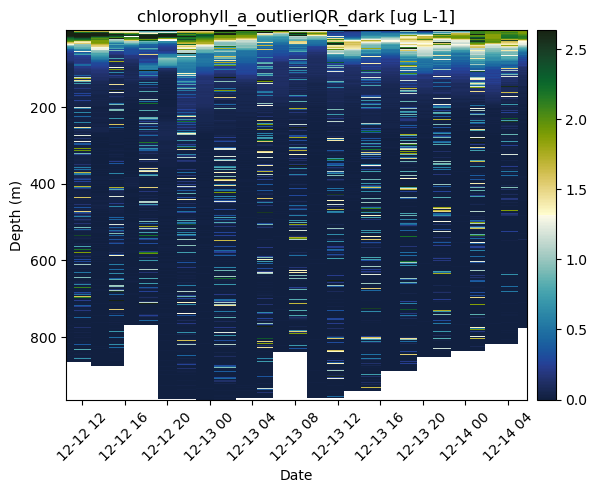

In [45]:
flr_dark = gt.optics.fluorescence_dark_count(flr_iqr, depth)

gt.plot(x, y, flr_dark, cmap=cmo.delta, robust=True)
plt.show()

#### Despiking 

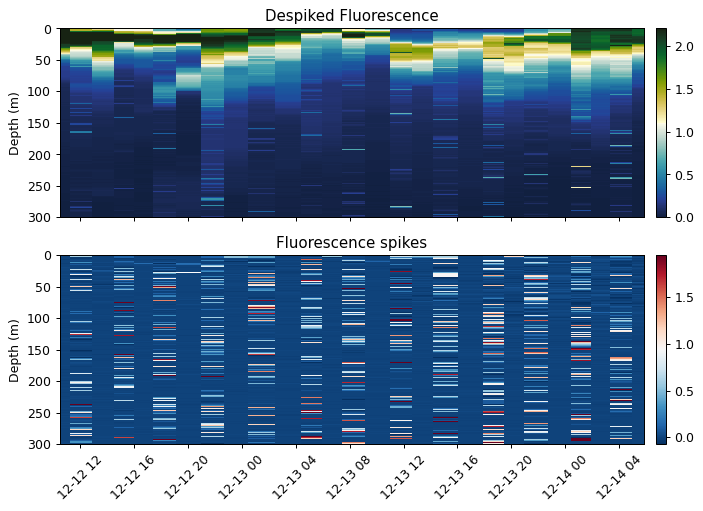

In [46]:
flr_base, flr_spikes = gt.cleaning.despike(flr_dark, 11, spike_method='median')

fig, ax = plt.subplots(2, 1, figsize=[9, 6], sharex=True, dpi=90)

gt.plot(x, y, flr_base, cmap=cmo.delta, ax=ax[0], robust=True)
gt.plot(x, y, flr_spikes, cmap=cm.RdBu_r, ax=ax[1])

[a.set_xlabel('') for a in ax]
[a.set_ylim(300, 0) for a in ax]

ax[0].set_title('Despiked Fluorescence')
ax[1].set_title('Fluorescence spikes')

plt.show()

#### Quenching Correction

This function uses the method outlined in Thomalla et al. (2017), briefly it calculates the quenching depth and performs the quenching correction based on the fluorescence to backscatter ratio. The quenching depth is calculated based upon the different between night and daytime fluorescence.

The default setting is for the preceding night to be used to correct the following day's quenching (`night_day_group=True`). This can be changed so that the following night is used to correct the preceding day. The quenching depth is then found from the difference between the night and daytime fluorescence, using the steepest gradient of the {5 minimum differences and the points the difference changes sign (+ve/-ve)}.

The function gets the backscatter/fluorescence ratio between from the quenching depth to the surface, and then calculates a mean nighttime ratio for each night. The quenching ratio is calculated from the nighttime ratio and the daytime ratio, which is then applied to fluorescence to correct for quenching. If the corrected value is less than raw, then the function will return the original raw data.

SMW note: changed from bbp470 to bb700. Not sure if/how this is ok for this quenching algorithm?

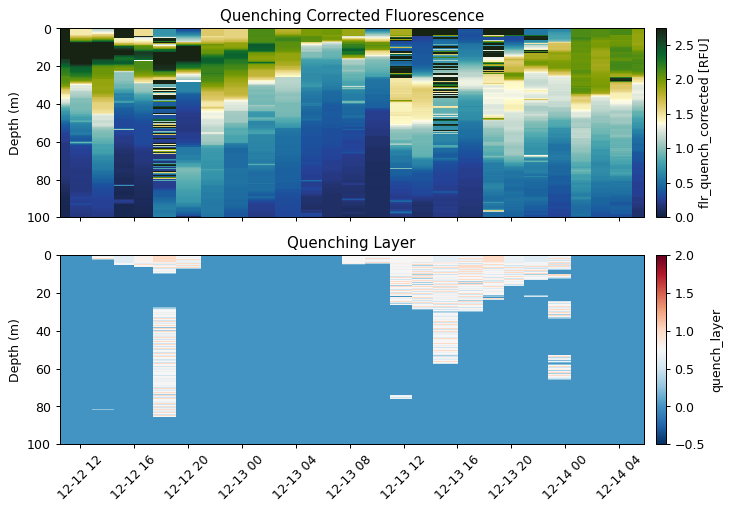

In [47]:
flr_qc, quench_layer = gt.optics.quenching_correction(
    flr_base, bb700, dives, depth, time, lats, lons,
    sunrise_sunset_offset=1, night_day_group=True)

fig, ax = plt.subplots(2, 1, figsize=[9, 6], sharex=True, dpi=90)

gt.plot(x, y, flr_qc, cmap=cmo.delta, ax=ax[0], robust=True)
gt.plot(x, y, quench_layer, cmap=cm.RdBu_r, ax=ax[1], vmin=-.5, vmax=2)

[a.set_xlabel('') for a in ax]
[a.set_ylim(100, 0) for a in ax]

ax[0].set_title('Quenching Corrected Fluorescence')
ax[1].set_title('Quenching Layer')

plt.show()

#### Wrapper function 


Fluorescence
	Mask bad profiles based on deep values (ref depth=300m)
	Number of bad profiles = 4/27
	Dark count correction
	Quenching correction
	Spike identification (spike window=11)
	Generating figures for despiking and quenching report


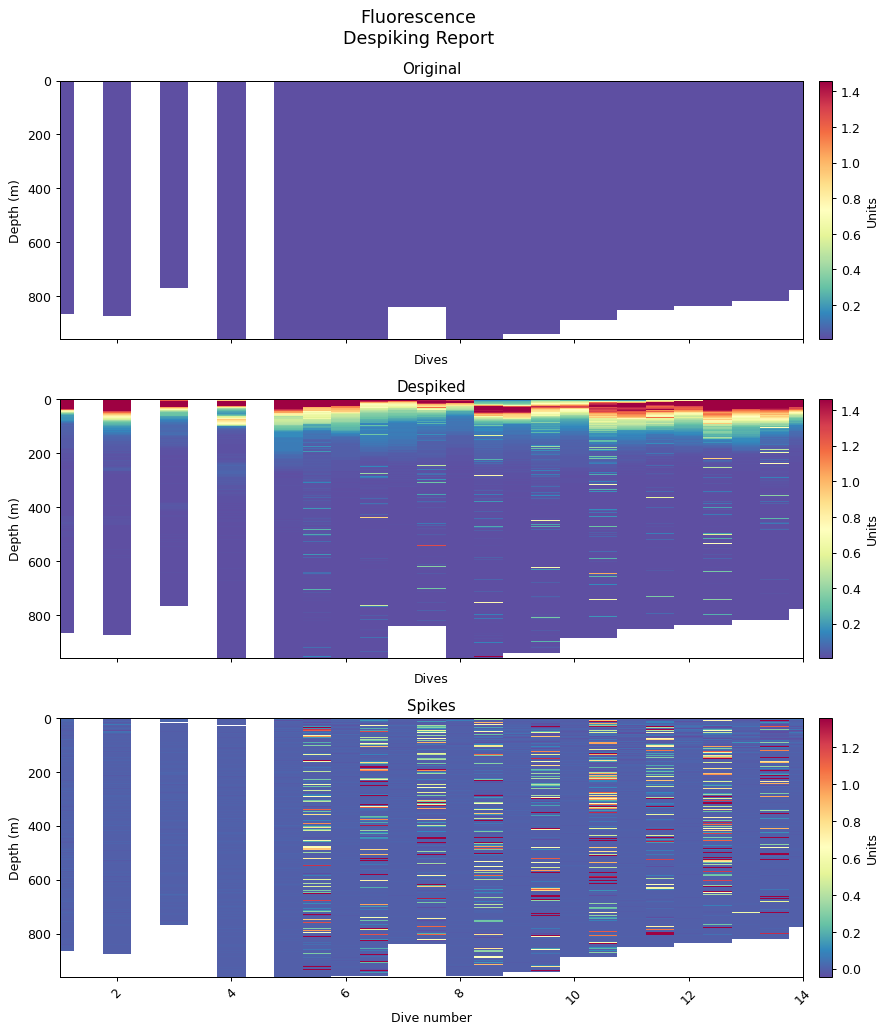

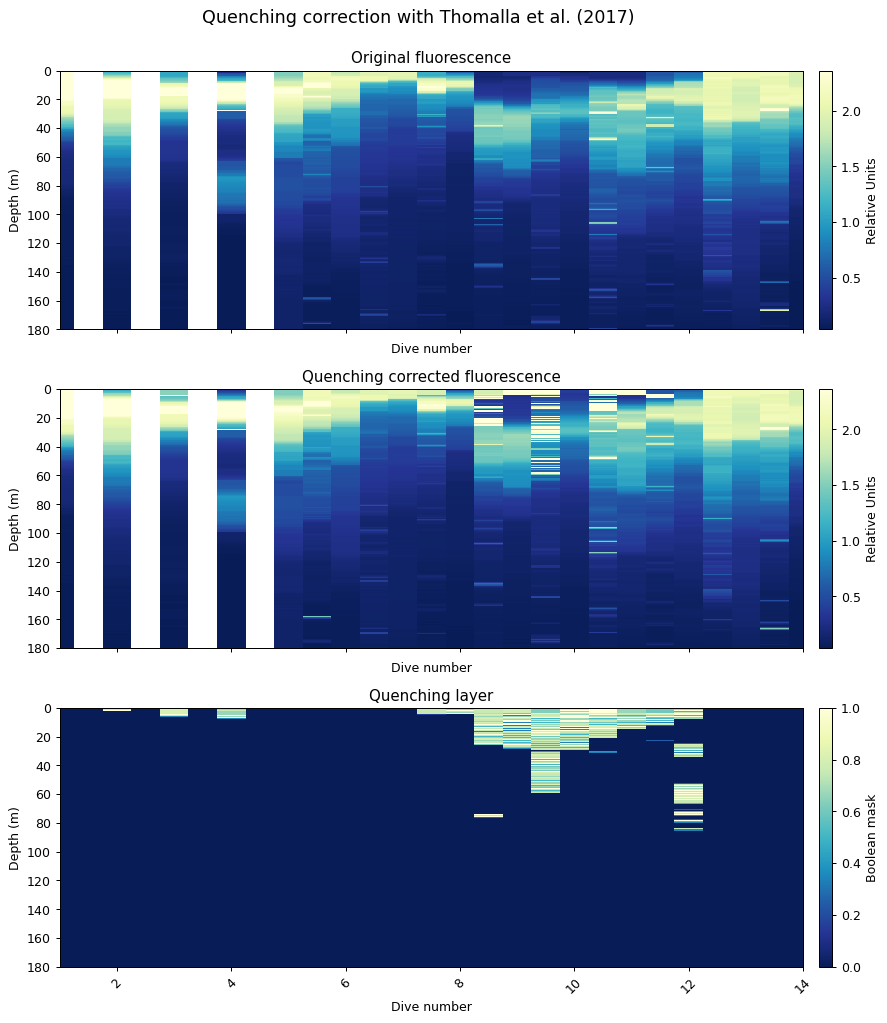

In [48]:
# flr_qnch, flr, qnch_layer = gt.calc_fluorescence(
#     fluor, bb700, dives, depth, time, lats, lons, 53, 0.0121,
#     profiles_ref_depth=300, deep_method='mean', deep_multiplier=1,
#     spike_window=11, spike_method='median', return_figure=False, 
#     night_day_group=False, sunrise_sunset_offset=2, verbose=True)

flr_qnch, flr, qnch_layer, [fig1, fig2] = gt.calc_fluorescence(
    fluor, bb700, dives, depth, time, lats, lons, 53, 0.0121,
    profiles_ref_depth=300, deep_method='mean', deep_multiplier=1,
    spike_window=11, spike_method='median', return_figure=True, 
    night_day_group=False, sunrise_sunset_offset=2, verbose=True)

dat['flr_qc'] = flr

# Oxygen

SMW: no example in GliderTools demo nb, but added this section to try out the GliderTools [calc_oxygen](https://github.com/GliderToolsCommunity/GliderTools/blob/master/glidertools/processing.py#L101) function.

Here we plot the raw values from the sensor, and then the values from the processing function. We probably will need to explore using the cleaning functions (shown above for other sensors/measurements) with the oxygen data.

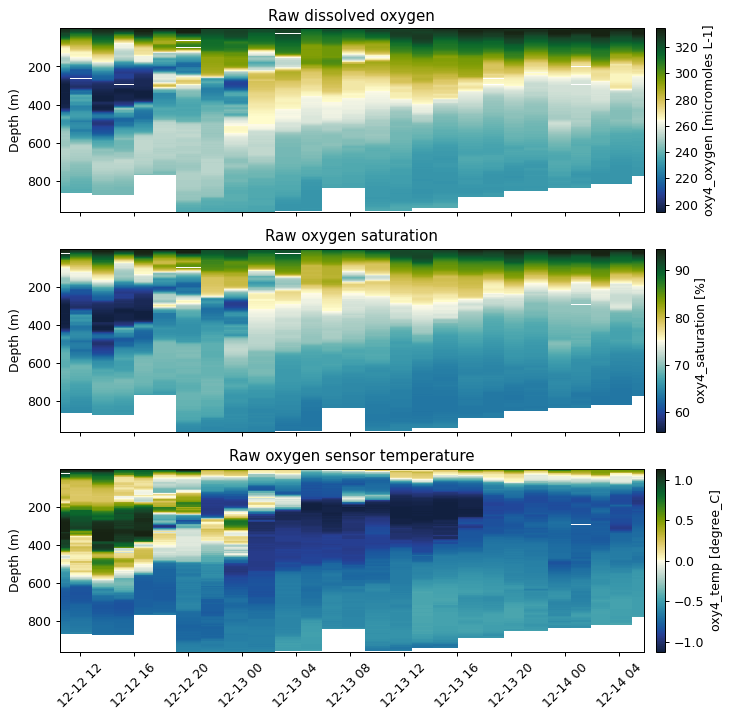

In [49]:
# gt.plot(x, y, dat.oxy4_oxygen, cmap=cmo.delta, robust=True)
# plt.title('Raw dissolved oxygen')
# plt.show()

# gt.plot(x, y, dat.oxy4_saturation, cmap=cmo.delta, robust=True)
# plt.title('Raw oxygen saturation')
# plt.show()

fig, ax = plt.subplots(3, 1, figsize=[9, 9], sharex=True, dpi=90)

gt.plot(x, y, dat.oxy4_oxygen, cmap=cmo.delta, ax=ax[0], robust=True)
gt.plot(x, y, dat.oxy4_saturation, cmap=cmo.delta, ax=ax[1], robust=True)
gt.plot(x, y, dat.oxy4_temp, cmap=cmo.delta, ax=ax[2], robust=True)

[a.set_xlabel('') for a in ax]
# [a.set_ylim(100, 0) for a in ax]

ax[0].set_title('Raw dissolved oxygen')
ax[1].set_title('Raw oxygen saturation')
ax[2].set_title('Raw oxygen sensor temperature')

plt.show()

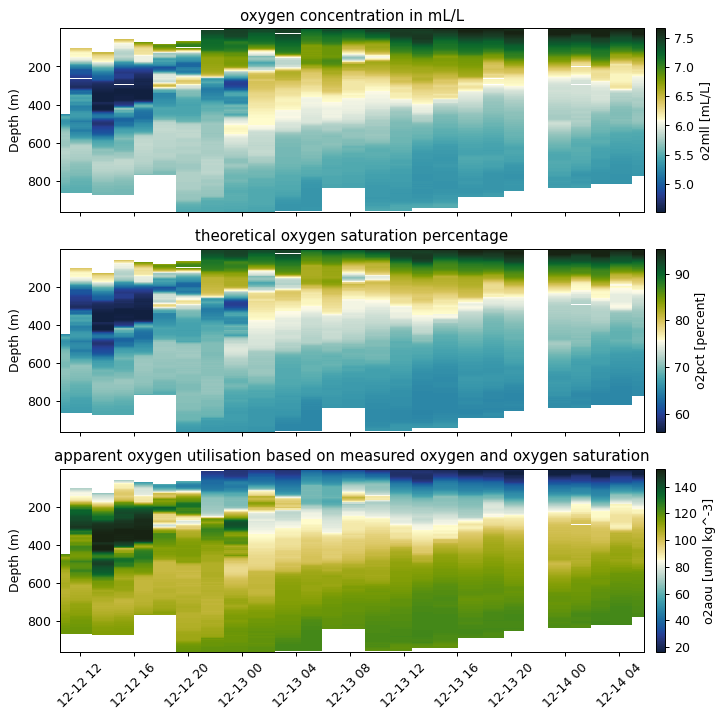

In [50]:
o2mll, o2pct, o2aou = gt.processing.calc_oxygen(
    dat.oxy4_oxygen, pres, salt_qc, temp_qc, lats, lons)

fig, ax = plt.subplots(3, 1, figsize=[9, 9], sharex=True, dpi=90)

gt.plot(x, y, o2mll, cmap=cmo.delta, ax=ax[0], robust=True)
gt.plot(x, y, o2pct, cmap=cmo.delta, ax=ax[1], robust=True)
gt.plot(x, y, o2aou, cmap=cmo.delta, ax=ax[2], robust=True)

[a.set_xlabel('') for a in ax]
# [a.set_ylim(100, 0) for a in ax]

ax[0].set_title('oxygen concentration in mL/L')
ax[1].set_title('theoretical oxygen saturation percentage')
ax[2].set_title('apparent oxygen utilisation based on measured oxygen and oxygen saturation')

plt.show()

# Calibration with bottle samples

SMW: commented this out

Bottle calibration can also be done using the `calibration` module. 

The bottle file needs to be in a specific format with dates (`datetime64` format), depth and the variable values. This can be imported with any method available. I recommend `pandas.read_csv` as shown in the example below. Note that latitude and longitude are not taken into account, thus the user needs to make sure that the CTD cast was in the correct location (and time, but this will be used to match the glider). 

In [51]:
# import pandas as pd

# fname = '/Users/luke/Work/Publications/2019_Gregor_Front_glider/figures/SOSCEX 3 PS1.csv'
# cal = pd.read_csv(fname, parse_dates=['datetime'], dayfirst=True)

The `calibration.bottle_matchup` function returns an array that matches the size of the ungridded glider data. 
The matching is done based on depth and time from both the glider and the CTD. The function will show how many samples have been matched and the smallest time difference between a CTD rosette cast and a dive (any time on the dive). 

### Using depth 

In [52]:
# %autoreload 2 

# dat['bottle_sal'] = gt.calibration.bottle_matchup(
#     dat.dives, dat.depth, dat.time, 
#     cal.depth, cal.datetime, cal.sal)

# model = gt.calibration.robust_linear_fit(dat.salt_qc, dat.bottle_sal, fit_intercept=True, epsilon=1.5)
# dat['salinity_qc'] = model.predict(dat.salt_qc)

### Using Density 

In [53]:
# %autoreload 2

# dat['bottle_sal'] = gt.calibration.bottle_matchup(
#     dat.dives, dat.density, dat.time, 
#     cal.density, cal.datetime, cal.sal)

# model = gt.calibration.robust_linear_fit(dat.salt_qc, dat.bottle_sal, fit_intercept=True, epsilon=1.5)
# dat['salinity_qc'] = model.predict(dat.salt_qc)

# Gridding and interpolation

### Vertical gridding
It is often more convenient and computationally efficient to work with data that has been gridded to a standard vertical grid (i.e. depths have been binned). 
GliderTools offers very easy to use and efficient tools to grid data once all the processing has been completed. 

The first task is to select the bin size of the data that will be gridded. 
GliderTools automatically selects bin sizes according to the sampling frequency of the dataset for every 50m.
This is shown in the figure below, where the 2D histogram shows the sampling frequency (by depth) and the line shows the automatically selected bin size rounded up to the nearest 0.5m.

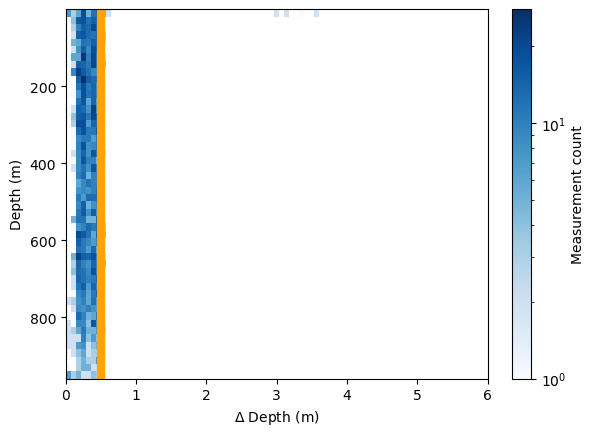

In [54]:
ax = gt.plot.bin_size(dat.depth, cmap=mpl.cm.Blues)
ax.set_xlim(0, 6)
line = ax.get_children()[1]
line.set_linewidth(6)
line.set_color('orange')

legend = ax.get_children()[-2]
legend.set_visible(False)

#### Gridding with automatic bin sizes

Gridding the data then becomes easy with automatic binning. But note that the x-coordinate has the be semi-discrete, e.g. dives number or dive time stamp average. You'll see that the gridding function also returns the mean bin size and then the average sampling frequency.

The function can return either an xr.DataArray or a pd.DataFrame. The DataArray is the default as metadata can be stored in these files (including coordinate information).

Gridded data can be passed to the plot function without x- and y-coordinates, as these are contained in the gridded data. 

In fact, data is silently passed through the gridding function when x- and y-coordinates are included in the `gt.plot` function

Mean bin size = 0.50
Mean depth binned (50 m) vertical sampling frequency = 0.12


(200.0, 0.0)

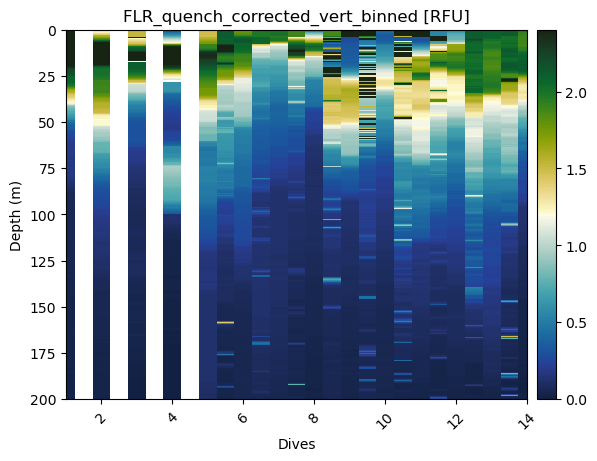

In [55]:
flr_gridded = gt.grid_data(dives, depth, flr)

ax = gt.plot(flr_gridded, cmap=cmo.delta)
ax.set_ylim(200, 0)

SMW: show plots of a couple of other gridded variables

Mean bin size = 0.50
Mean depth binned (50 m) vertical sampling frequency = 0.12


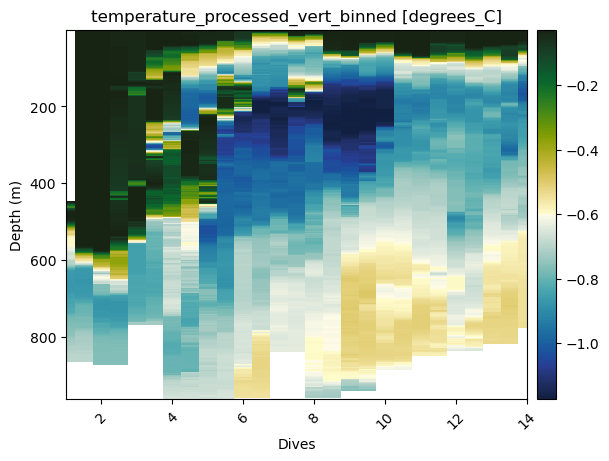

Mean bin size = 0.50
Mean depth binned (50 m) vertical sampling frequency = 0.12


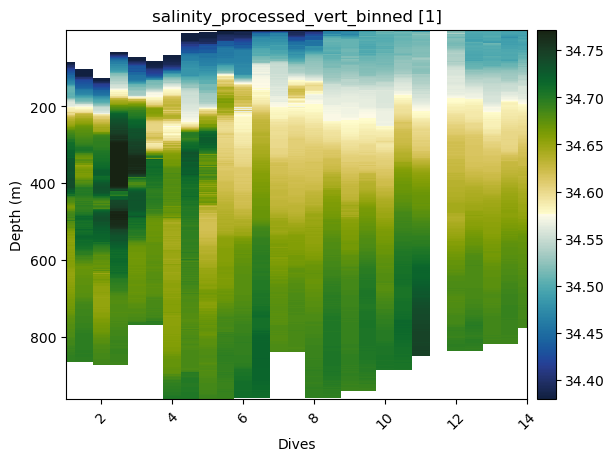

Mean bin size = 0.50
Mean depth binned (50 m) vertical sampling frequency = 0.12


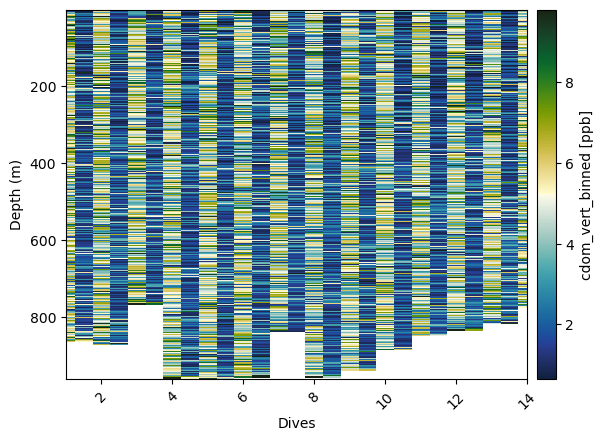

In [56]:
tmp_gridded = gt.grid_data(dives, depth, temp_qc)
gt.plot(tmp_gridded, cmap=cmo.delta)
plt.show()

salt_gridded = gt.grid_data(dives, depth, salt_qc)
gt.plot(salt_gridded, cmap=cmo.delta)
plt.show()

cdom_gridded = gt.grid_data(dives, depth, dat.cdom)
gt.plot(cdom_gridded, cmap=cmo.delta)
plt.show()

#### Gridding with manually defined bins

There is also the option to manuualy define your bins if you'd prefer. 
A custom bin array needs to be created.  
Use `np.arange` to create sections of the bins and combine them with `np.r_` as shown below:

Mean bin size = 1.25
Mean depth binned (50 m) vertical sampling frequency = 0.12


(200.0, 0.0)

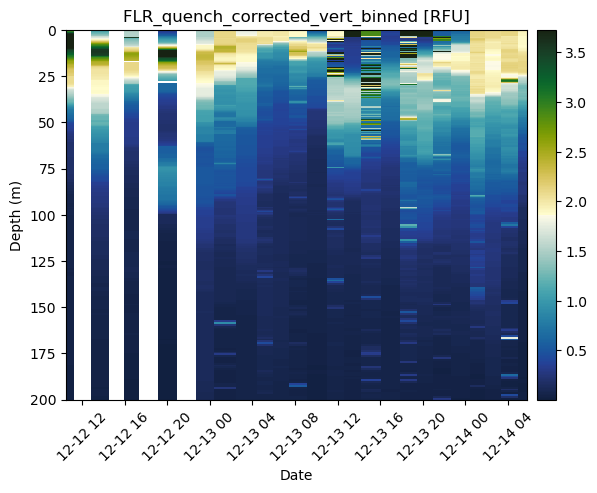

In [57]:
custom_bin = np.r_[
    np.arange(0, 100, 0.5),
    np.arange(100, 400, 1.0),
    np.arange(400, 1000, 2.0)]

flr_gridded = gt.grid_data(x, y, flr, bins=custom_bin)

# The plot below is the standard plotting procedure for an xarray.DataArray
gt.plot(flr_gridded, cmap=cmo.delta)
plt.ylim(200, 0)

# 3D interactive plot

This is purely for investigative purposes, but provides a good way to interact with the data. 

SMW: Running the below cell will open a browser window with a 3D, interactive map.

In [58]:
# plotly_figure = gt.plot.section3D(
#     dives, depth, lons, lats, salt_qc
#     # zmin=-500, vmax=.999, vmin=.005
# )

# Write to file

In [59]:
dat

<xarray.Dataset>
Dimensions:             (time: 177116)
Coordinates:
  * time                (time) datetime64[ns] 2022-12-12T09:45:21.171570176 ....
    bbp700              (time) float64 nan nan nan ... 6.45e-08 6.574e-08
    bbp700_spikes       (time) float64 nan nan nan ... -2.491e-09 0.0 -7.044e-09
Data variables: (12/45)
    latitude            (time) float64 nan nan nan nan ... nan nan nan nan
    longitude           (time) float64 nan nan nan nan ... nan nan nan nan
    depth               (time) float64 0.009904 nan nan nan ... 772.9 nan 773.0
    m_depth             (time) float32 nan nan nan nan ... 776.4 nan nan nan
    m_heading           (time) float32 nan nan nan nan nan ... 2.058 nan nan nan
    m_pitch             (time) float32 nan nan nan nan ... 0.05236 nan nan nan
    ...                  ...
    profile_direction   (time) <U1 'd' 'd' 'd' 'd' 'd' ... 'd' 'd' 'd' 'd' 'd'
    dives               (time) float64 1.0 1.0 1.0 1.0 ... 14.0 14.0 14.0 14.0
    temp_qc             (time) float64 nan nan nan ... -0.5417 -0.5417 -0.5417
    salt_qc             (time) float64 nan nan nan nan ... 34.69 34.69 34.69
    dens0               (time) float64 nan nan nan ... 1.028e+03 1.028e+03
    flr_qc              (time) float64 13.56 10.37 8.359 ... 0.007202 0.007202
Attributes: (12/68)
    Conventions:                     CF-1.6, COARDS, ACDD-1.3
    acknowledgment:                  This work was supported by funding from ...
    cdm_data_type:                   trajectory
    comment:                         TrajectoryProfile
    contributor_name:                Christian Reiss, George Watters, Jennife...
    contributor_role:                Principal Investigator, Principal Invest...
    ...                              ...
    time_coverage_resolution:        PTS
    time_coverage_start:             2022-12-12T09:45:21Z
    title:                           amlr06 20221212T102924Z trajectoryProfile
    wmo_platform_code:                
    deployment_name:                 amlr06-20221205T1322
    uuid:                            b1a3b6a8-0365-47da-879a-ea9e0edb6a8d